# K-MEAN CLUSTERING CUSTOMER'S SEGMENTAION

# Step 1: Import necessary libraries and load the data

In [1]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel("customers.xlsx")

# Display the first few rows to understand the structure
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Step 2: Select the relevant columns for clustering (Quantity and UnitPrice)

In [2]:
# Select the Quantity and UnitPrice columns
data = df[['Quantity', 'UnitPrice']]

# Display the first few rows of the selected data
data.head()


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


# Step 3: Scale the data using StandardScaler

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

# Display the scaled data
scaled_data[:5]


array([[-0.01628867, -0.02130135],
       [-0.01628867, -0.01262006],
       [-0.00711777, -0.01923438],
       [-0.01628867, -0.01262006],
       [-0.01628867, -0.01262006]])

# Step 4: Determine the optimal number of clusters using the Elbow method

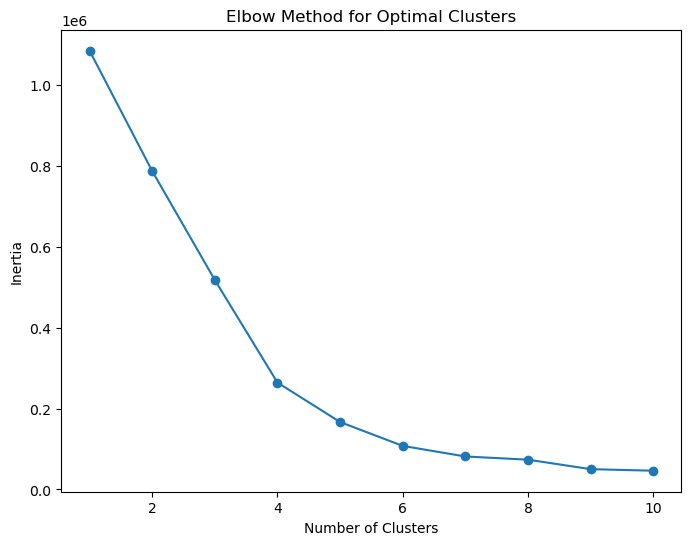

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different numbers of clusters
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# Step 5: Apply KMeans clustering (after choosing the optimal number of clusters)

In [5]:
# Choose the optimal number of clusters from the elbow method
n_clusters = 4  # Assume 4 based on the elbow plot, adjust as needed

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the first few rows of the dataframe with the cluster labels
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


# Step 6: Display each cluster as a table

In [6]:
# Create a dictionary to map the cluster number to labels A, B, C, etc.
cluster_labels = {i: chr(65 + i) for i in range(n_clusters)}

# Map the cluster labels
df['Cluster Label'] = df['Cluster'].map(cluster_labels)

# Display the first few rows of the dataframe with the cluster labels
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Cluster Label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,A
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,A
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A


In [7]:
# Display each cluster's data as a table, grouped by the 'Cluster Label'
for label in cluster_labels.values():
    print(f"Cluster {label}:\n")
    cluster_data = df[df['Cluster Label'] == label]
    display(cluster_data)  # If you're using Jupyter, this will display the table
    print("\n" + "-"*50 + "\n")


Cluster A:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Cluster Label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,A
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,A
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,A
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,A
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,A
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,A
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,A



--------------------------------------------------

Cluster B:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Cluster Label
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,1,B
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,1,B
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,1,B
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,1,B
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,1,B
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,1,B
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,1,B
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,1,B
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom,1,B
96845,C544589,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:11:00,5258.77,NaN,United Kingdom,1,B



--------------------------------------------------

Cluster C:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Cluster Label
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2,C
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2,C



--------------------------------------------------

Cluster D:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Cluster Label
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,3,D
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,3,D



--------------------------------------------------



# Step 7: Save the results to a CSV file

In [8]:
# Save the dataframe with cluster labels and silhouette scores to a CSV file
df.to_csv('customer_clusters_labeled.csv', index=False)

# Confirm the file is saved
print("Customer clusters saved as 'customer_clusters_labeled.csv'")


Customer clusters saved as 'customer_clusters_labeled.csv'


# Step 8: Plot the clusters

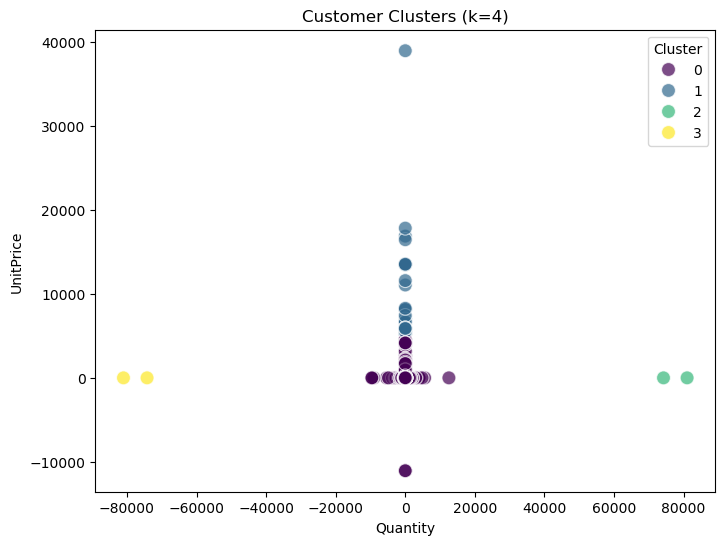

In [9]:
import seaborn as sns

# Create a plot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title(f'Customer Clusters (k={n_clusters})')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


# Step 10: Save the results to a CSV file

In [10]:
# Save the dataframe with cluster labels and silhouette scores to a CSV file
df.to_csv('customer_clusters_labeled.csv', index=False)

# Confirm the file is saved
print("Customer clusters saved as 'customer_clusters_labeled.csv'")
